# Lab 02

This work will cover the usage of convolution and correlation in signal processing and in statistics.

## 1. Convolution and correlation

From the point of view of signal processing convolution and correlation are very similar operations. They are defined as following

Convolution:
$$ (f*g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y-x)dx$$
Cross-correlation:
$$ (f\star g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y+x)dx$$

If `g(x)` is symmetric then the convolution and cross-correlation are the same.

Let's create a numpy array with square-shaped signal.

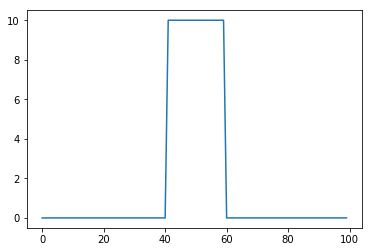

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 100 # sample count
startX = 40  
endX = 60
x = np.arange(N)
x = ((x < endX) * (x> startX))*10
plt.plot(x);

Let's create a triangular signal.

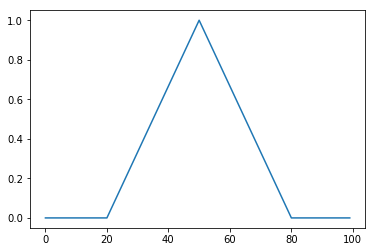

In [5]:
y = np.zeros(100)
heightY = 1.0
startY = 20
endY=80
widthY = (endY-startY)/2.0
for i in range(startY,N/2):
 y[i] =  (i-startY) * (heightY / widthY) 
for i in range(N/2,endY):
 y[i] = 2*heightY - ((i-startY) * (heightY / widthY))
plt.plot(y);

Now let's apply two operations on the inputs and compare results.

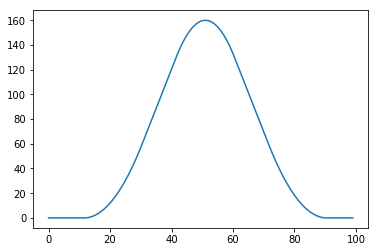

In [6]:
from scipy.signal import convolve
x_conv = convolve(x,y,'same')
plt.plot(x_conv);

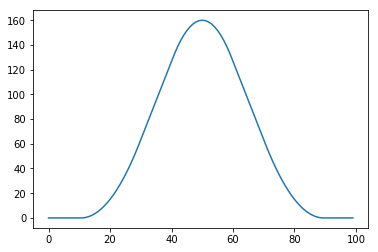

In [7]:
from scipy.signal import correlate
x_corr = correlate(x,y,'same')
plt.plot(x_corr);

As you see, the result of convolution for symmetric kernel is the same as result of correlation.

### Exercise 1
Try these two operations with the non-symetric kernel.

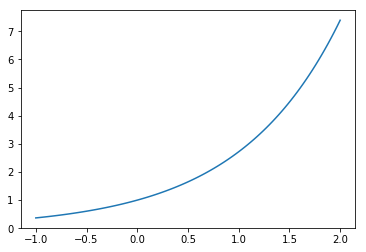

In [8]:
x=np.linspace(-1,2,100)
y=np.exp(x)

plt.plot(x,y)

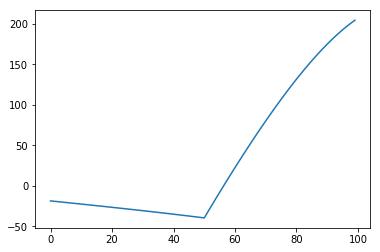

In [9]:
x_conv = convolve(x,y,'same')
plt.plot(x_conv);

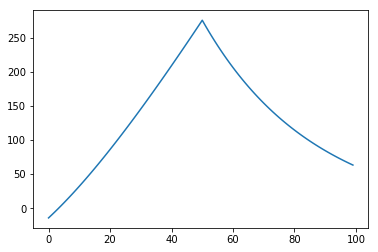

In [10]:
x_corr = correlate(x,y,'same')
plt.plot(x_corr);

## 2. Convolution of distributions
In statistics convolution plays important role.

The distribution of the *sum of two independent variables* is the convolution of the distributions.

I.e. if we consider two independent continuous random variables `X` and `Y` with PDFs `f` and `g` the PDF of their sum (X+Y) will be computed as: 

$$ d(x) = (f * g)(x) $$

We can get an interesting result if we consider the sum of several random variables with identical distributions, i.e. convolution of a distribution with itself several times.
2
For example, let's take a uniform distribution.

In [43]:
%%capture
orig = np.random.uniform(0,10,1200)
h = plt.hist(orig, bins=120, normed=True);
orig = h[0]
t = h[1]
xconv = np.copy(orig)

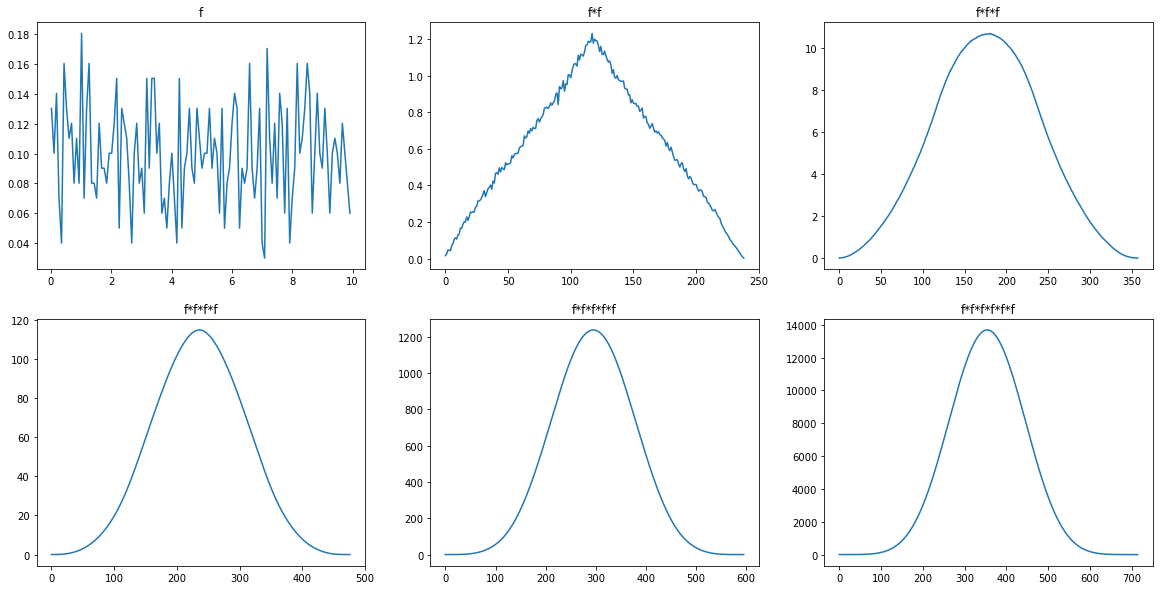

In [44]:
plt.figure(figsize=(20,10))
ax = plt.subplot(2, 3, 1)
ax.set_title("f")
ax.plot(t[:-1], orig);
for i in range(5):
    xconv = convolve(orig, xconv)
    ax = plt.subplot(2, 3, i+2)
    ax.set_title(("f*"*(i+2))[:-1])
    ax.plot(xconv);

This is an illustration of Central Limit Theorem: the distribution of the sum of random variables which are iid (independent identically distributed) has a form of a Gaussian.

## 3. Correlation and covariance

In statistics the linear correlation between two variables X and Y can be measured using Pearson correlation coefficient:

$$ corr(x,y) = \frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt {\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}}$$

In [45]:
import pandas as pd
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data.fillna(data.mean(), inplace=True)
data.corr()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,1.000000,-0.334072,-0.241473,-0.371150,0.168519,0.123772,-0.139724
FSIQ,-0.334072,1.000000,0.946639,0.934125,-0.049590,-0.084175,0.357641
VIQ,-0.241473,0.946639,1.000000,0.778135,-0.071988,-0.069610,0.337478
PIQ,-0.371150,0.934125,0.778135,1.000000,0.002461,-0.075462,0.386817
Weight,0.168519,-0.049590,-0.071988,0.002461,1.000000,0.690199,0.501977
Height,0.123772,-0.084175,-0.069610,-0.075462,0.690199,1.000000,0.601308
MRI_Count,-0.139724,0.357641,0.337478,0.386817,0.501977,0.601308,1.000000


The unnormalized version of the correlation coefficient is the measure of joint variability - **covariance**.
$$ cov(x,y) = \frac{1}{n-1}\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}) $$

In [46]:
data.cov()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,136.666667,-94.051282,-66.666667,-97.500000,45.052632,5.705457,-1.180682e+05
FSIQ,-94.051282,579.946154,538.376923,505.501282,-27.310391,-7.993097,6.225462e+05
VIQ,-66.666667,538.376923,557.720513,412.939744,-38.878543,-6.482117,5.760814e+05
PIQ,-97.500000,505.501282,412.939744,504.948077,1.264507,-6.686325,6.282894e+05
Weight,45.052632,-27.310391,-38.878543,1.264507,522.971660,62.237382,8.297610e+05
Height,5.705457,-7.993097,-6.482117,-6.686325,62.237382,15.548060,1.713821e+05
MRI_Count,-118068.230769,622546.153846,576081.435897,628289.384615,829761.016194,171382.098817,5.224695e+09


As you can see, the correlation and covariance always have the same sign which shows the tendency in the linear relationship between variables.

Let's now consider more closely the correlation between `Height` and `Weight` of the people from experiments.

In [47]:
import scipy 
scipy.stats.pearsonr(data['Height'], data['Weight'])[0]

0.69019868434268938

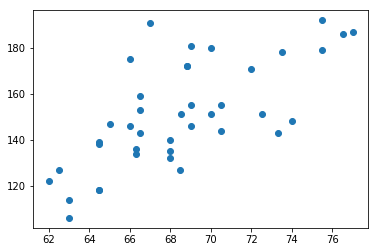

In [48]:
plt.scatter(data['Height'], data['Weight']);

### Exercise 2

Let's compare the difference in the definition of **correlation** from the signal processing point of view and from the point of view of statistics.

1. Compute the correlation from `scipy.signal` package of demeaned signals. Divide by the number of observations - 1.
2. Compute the covariance using `numpy` or any other package. Compare results

In [49]:
# compute demeaned correlation divided by n-1 using scipy.signal
n = len(data)
n

40

In [58]:
mean_height = np.mean(data['Height'])
mean_height

68.52564102564102

In [57]:
mean_weight = np.mean(data['Weight'])
mean_weight

151.05263157894737

In [60]:
demean_height = data['Height'] - mean_height
demean_height

0    -4.025641
1     3.974359
2     4.774359
3     0.274359
4    -3.525641
5     0.474359
6    -4.025641
7    -2.525641
8    -2.225641
9     0.274359
10   -4.025641
11    1.474359
12    0.474359
13    1.974359
14   -2.525641
15   -0.525641
16   -0.025641
17    4.974359
18   -2.225641
19    1.474359
20    0.000000
21    7.974359
22   -6.525641
23   -0.525641
24   -5.525641
25    3.474359
26   -0.525641
27    8.474359
28   -5.525641
29   -2.025641
30   -6.025641
31   -1.525641
32    6.974359
33    0.474359
34   -2.025641
35   -2.025641
36    1.974359
37   -4.025641
38    5.474359
39    6.974359
Name: Height, dtype: float64

In [61]:
demean_weight = data['Weight'] - mean_weight
demean_weight

0    -33.052632
1      0.000000
2     -8.052632
3     20.947368
4     -4.052632
5     -5.052632
6    -13.052632
7     23.947368
8    -17.052632
9     20.947368
10   -33.052632
11    -0.052632
12     3.947368
13     3.947368
14    -5.052632
15   -16.052632
16   -24.052632
17    26.947368
18   -15.052632
19    28.947368
20     0.000000
21    34.947368
22   -29.052632
23   -19.052632
24   -37.052632
25    19.947368
26   -11.052632
27    35.947368
28   -45.052632
29     7.947368
30   -24.052632
31    39.947368
32    40.947368
33    29.947368
34    -8.052632
35     1.947368
36    -7.052632
37   -12.052632
38    -3.052632
39    27.947368
Name: Weight, dtype: float64

In [65]:
correlation = correlate(demean_height, demean_weight)
correlation

array([ -112.50607287,   123.36167341,   169.81808367,   -26.4168691 ,
        -192.78259109,    27.19757085,  -216.65978408,  -122.87813765,
         126.51336032,   561.91430499,  -111.57894737,    72.29730094,
        -463.05074224,   -79.47260459,  -438.05249663,   262.32388664,
        -289.48758435,   194.19419703,  -668.48609987,   433.02442645,
        -104.68016194,   783.93198381,  -683.78448043,   618.98677463,
        -225.7708502 ,   575.18124157,  -661.34035088,   864.60890688,
        -718.69433198,   556.19109312, -1285.42024291,   674.28434548,
        -764.84224022,  1529.42415655,  -642.64089069,   901.03306343,
       -1839.08461538,   420.79703104,  -698.06720648,  2427.25789474,
        -808.33063428,   334.5734143 , -1492.5902834 ,   351.78434548,
        -519.90796221,  1362.86234818,   419.13994602,   736.05303644,
        -674.9831309 ,    -6.85128205,  -741.48920378,   549.88650472,
         -44.29311741,   652.3537112 ,  -456.53495277,  -324.7120108 ,
      

In [66]:
correlation / (n - 1)

array([ -2.8847711 ,   3.16311983,   4.35430984,  -0.67735562,
        -4.94314336,   0.69737361,  -5.55537908,  -3.15072148,
         3.24393232,  14.4080591 ,  -2.86099865,   1.85377695,
       -11.87309595,  -2.03775909, -11.2321153 ,   6.7262535 ,
        -7.42275857,   4.97933839, -17.14066923,  11.10319042,
        -2.68410672,  20.1008201 , -17.5329354 ,  15.87145576,
        -5.78899616,  14.74823696, -16.95744489,  22.16945915,
       -18.42805979,  14.26131008, -32.95949341,  17.28934219,
       -19.61133949,  39.21600401, -16.47797156,  23.10341188,
       -47.15601578,  10.78966746, -17.89915914,  62.23738192,
       -20.72642652,   8.57880549, -38.27154573,   9.02011142,
       -13.33097339,  34.94518841,  10.7471781 ,  18.87315478,
       -17.30725977,  -0.1756739 , -19.01254369,  14.09965397,
        -1.13572096,  16.72701824, -11.70602443,  -8.32594899,
       -19.91933977,  20.85166961,  -2.51020797,  13.92015295,
       -14.34070383,   6.43752379,  -5.76540711,   6.39

In [51]:
# compute covariance using numpy
np.cov(data['Height'])

### Exercise 3

1. Implement the computation of Pearson correlation coefficient. 
1. Implement calculation of **t-statistics**, and **p-value** for the correlation coefficient. Add p-value to return value of the function.
1. Compare results with `scipy` implementation for `Height` and `Weight`.

In [52]:
def pearsonr(x, y):
    n_x = len(x) 
    n_y = len(y)
    df = n_x + n_y - 2
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_x = np.std(x)
    std_y = np.std(y)
    f = np.dot((x - mean_x), (y - mean_y)) / np.sqrt(np.sum(np.power((x - mean_x), 2)) * np.sum(np.power((y - mean_y), 2)))
    u = (mean_x - mean_y) / (np.power(std_x, 2) / n_x + np.power(std_y, 2)/ n_y)
    v = scipy.stats.u.sf(np.abs(u), df) * 2
    return u,v

In [53]:
print pearsonr(x,y)

AttributeError: 'module' object has no attribute 'u'

In [54]:
pearsonr(data['Height'], data['Weight'])

AttributeError: 'module' object has no attribute 'u'